<a href="https://colab.research.google.com/github/123ich/App-Web-AGIM/blob/master/model%20training/Copie_de_vgg19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#SETUP

In [ ]:
!pip install tensorflowjs==3.8

In [ ]:
!pip install --upgrade packaging


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflowjs as tfjs

In [ ]:
import tensorflow as tf
import os
import numpy as np
from matplotlib import pyplot as plt
import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D,Flatten
from tensorflow.keras.applications import VGG19
from tensorflow import keras
tf.get_logger().setLevel('ERROR')

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [ ]:
data_dir = "/content/drive/MyDrive/affectNet/train_class"

In [ ]:
data_dir2 = "/content/drive/MyDrive/affectNet/val_class"

Load Data

In [ ]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 30017 files belonging to 6 classes.


In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
batch = data_iterator.next()

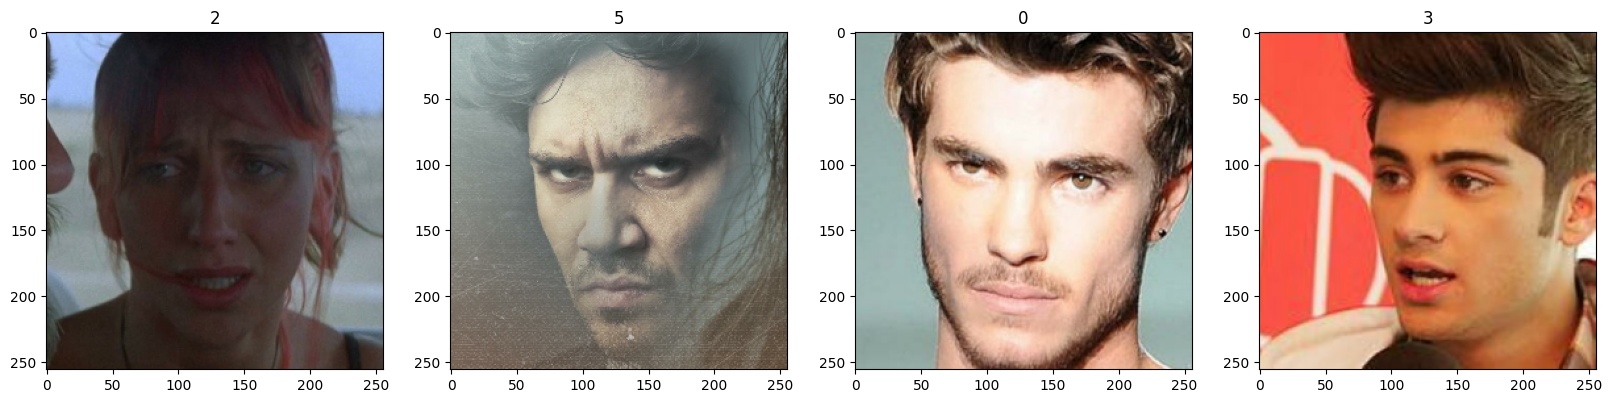

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [ ]:
val_data = tf.keras.utils.image_dataset_from_directory(data_dir2)

Found 3000 files belonging to 6 classes.


In [ ]:
val_data_iterator = val_data.as_numpy_iterator()

In [ ]:
val_batch = val_data_iterator.next()

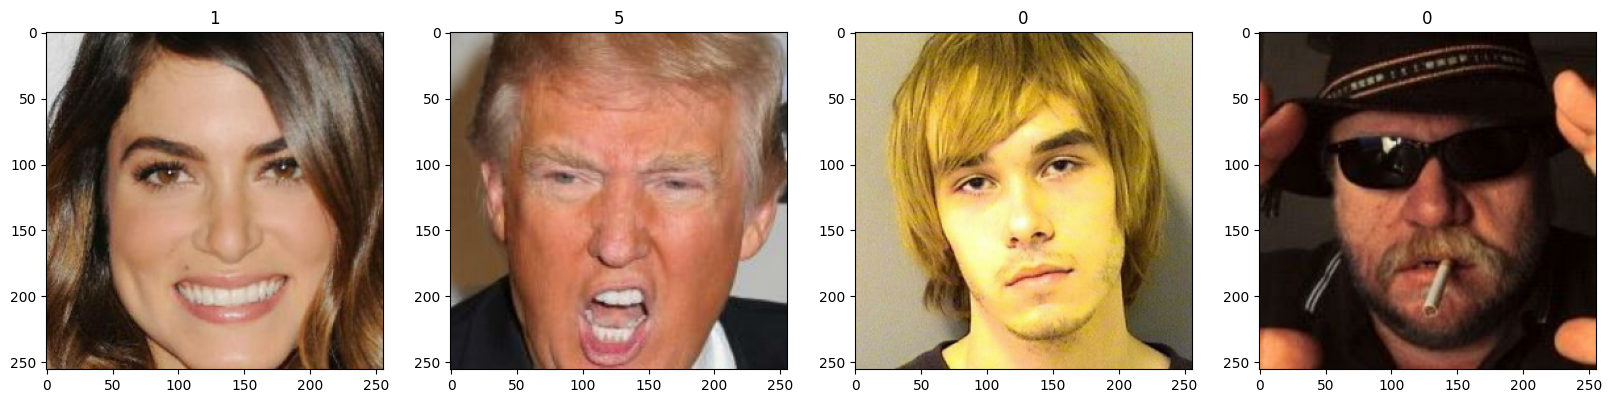

In [ ]:

fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(val_batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(val_batch[1][idx])

SCALE DATA

In [ ]:
data = data.map(lambda x,y: (x/255, y))

In [ ]:
val_data= val_data.map(lambda x,y: (x/255, y))

In [ ]:
data.as_numpy_iterator().next()

(array([[[[1.56862754e-02, 2.74509806e-02, 4.70588244e-02],
          [1.55484071e-02, 2.73131132e-02, 4.69209552e-02],
          [1.17647061e-02, 2.35294122e-02, 4.31372561e-02],
          ...,
          [2.74077170e-02, 1.57295372e-02, 4.31372561e-02],
          [2.74493638e-02, 1.56878904e-02, 4.31372561e-02],
          [2.74055637e-02, 1.57316923e-02, 4.31372561e-02]],
 
         [[1.56846587e-02, 2.74493638e-02, 4.70572077e-02],
          [1.54153863e-02, 2.71800924e-02, 4.67879362e-02],
          [1.17566278e-02, 2.35213339e-02, 4.31291759e-02],
          ...,
          [2.36213244e-02, 1.95159316e-02, 4.31372561e-02],
          [2.71752458e-02, 1.59620102e-02, 4.31372561e-02],
          [2.34375000e-02, 1.96997542e-02, 4.31372561e-02]],
 
         [[1.56403184e-02, 2.74050254e-02, 4.70128693e-02],
          [1.17566278e-02, 2.35213339e-02, 4.31291759e-02],
          [1.13186110e-02, 2.30833162e-02, 4.26911600e-02],
          ...,
          [1.93915274e-02, 2.33130958e-02, 4.3137

In [ ]:

val_data.as_numpy_iterator().next()

(array([[[[0.8901961 , 0.8862745 , 0.87058824],
          [0.8901961 , 0.8862745 , 0.87058824],
          [0.8901961 , 0.8862745 , 0.87058824],
          ...,
          [0.8862745 , 0.8784314 , 0.88235295],
          [0.8862745 , 0.8784314 , 0.88235295],
          [0.8862745 , 0.8784314 , 0.88235295]],
 
         [[0.8901961 , 0.8862745 , 0.87058824],
          [0.8901961 , 0.8862745 , 0.87058824],
          [0.8901961 , 0.8862745 , 0.87058824],
          ...,
          [0.8862745 , 0.8784314 , 0.88235295],
          [0.8862745 , 0.8784314 , 0.88235295],
          [0.8862745 , 0.8784314 , 0.88235295]],
 
         [[0.8901961 , 0.8862745 , 0.87058824],
          [0.8901961 , 0.8862745 , 0.87058824],
          [0.8901961 , 0.8862745 , 0.87058824],
          ...,
          [0.8862745 , 0.8784314 , 0.88235295],
          [0.8862745 , 0.8784314 , 0.88235295],
          [0.8862745 , 0.8784314 , 0.88235295]],
 
         ...,
 
         [[0.9411765 , 0.9372549 , 0.92156863],
          [0.94117

Split val data to test and validation

In [ ]:
val_size = int(len(val_data)*.7)
test_size = int(len(val_data)*.3)

In [ ]:
val = val_data.take(val_size)
test = val_data.skip(val_size).take(test_size)

In [ ]:
train=data.take(len(data))

MODELING

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
data_augmentation =Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(256,
                                  256,
                                  3)),
    layers.RandomRotation(0.1),
  ]
)


In [ ]:
vgg = VGG19(input_shape= (256,256,3),include_top=False)

80134624/80134624 [==============================] - 3s 0us/step


In [ ]:
for layer in vgg.layers:
    layer.trainable = False

In [ ]:
from tensorflow.keras.layers import Dropout

In [ ]:
#personalize the model
model = Sequential([
    vgg,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),

    Dropout(0.2),
    Dense(6, activation='softmax')
])

In [ ]:
# type(train)

In [ ]:

# model=Model(inputs=y,outputs=prediction)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 vgg19 (Functional)          (None, 8, 8, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 512)               16777728  
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 6)                

In [ ]:
model.compile(
  optimizer=tf.keras.optimizers.Adam(
    learning_rate=1e-5),
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
  metrics=['accuracy'])

In [ ]:
model.load_weights('/content/drive/MyDrive/vgg19_classifier.h5')

1/1 [==============================] - 8s 8s/step
[[ 9.155269  25.692299  34.836277  10.8021345 15.981168   3.5328526]]


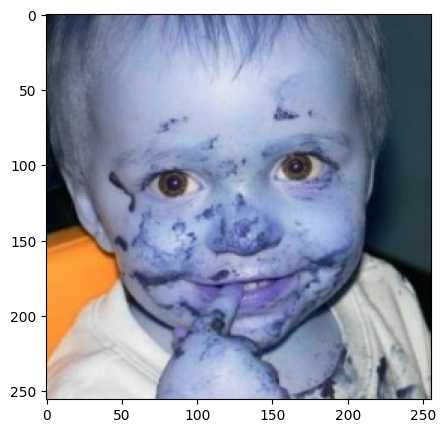

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
image=cv2.imread('/content/drive/MyDrive/affectNet/train_class/class002/image0000691.jpg')
image = cv2.resize(image, (256, 256))
image = image.astype(np.float32) / 255.0
image_tensor = tf.convert_to_tensor(np.expand_dims(image, axis=0), dtype=tf.float32)
yhat = model.predict(image_tensor)
fig, ax = plt.subplots(ncols=1, figsize=(5,5))
ax.imshow(image)
print(yhat*100)


In [ ]:
tfjs.converters.save_keras_model(model,'/content/drive/MyDrive/tfjs_model6')

In [ ]:
logdir='logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=15, validation_data=val, callbacks=[tensorboard_callback])


Epoch 1/15
939/939 [==============================] - 3882s 4s/step - loss: 1.6777 - accuracy: 0.3330 - val_loss: 1.3955 - val_accuracy: 0.4236
Epoch 2/15
939/939 [==============================] - 215s 228ms/step - loss: 1.4459 - accuracy: 0.4066 - val_loss: 1.4667 - val_accuracy: 0.4139
Epoch 3/15
939/939 [==============================] - 208s 221ms/step - loss: 1.3803 - accuracy: 0.4438 - val_loss: 1.3410 - val_accuracy: 0.4582
Epoch 4/15
939/939 [==============================] - 207s 220ms/step - loss: 1.3512 - accuracy: 0.4563 - val_loss: 1.2892 - val_accuracy: 0.4788
Epoch 5/15
939/939 [==============================] - 207s 220ms/step - loss: 1.3202 - accuracy: 0.4713 - val_loss: 1.5304 - val_accuracy: 0.4053
Epoch 6/15
939/939 [==============================] - 208s 220ms/step - loss: 1.3042 - accuracy: 0.4791 - val_loss: 1.3149 - val_accuracy: 0.4683
Epoch 7/15
939/939 [==============================] - 208s 221ms/step - loss: 1.2805 - accuracy: 0.4929 - val_loss: 1.3360 - v

plot performance

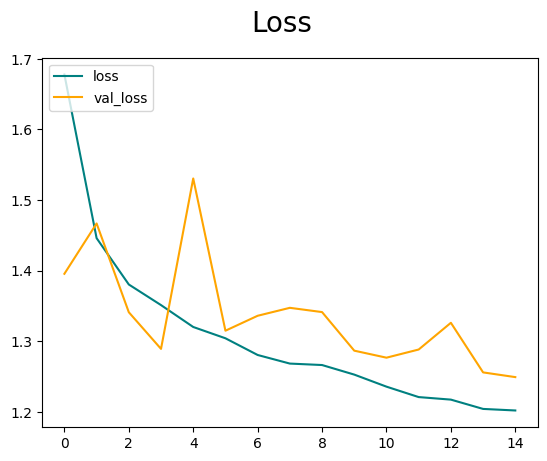

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

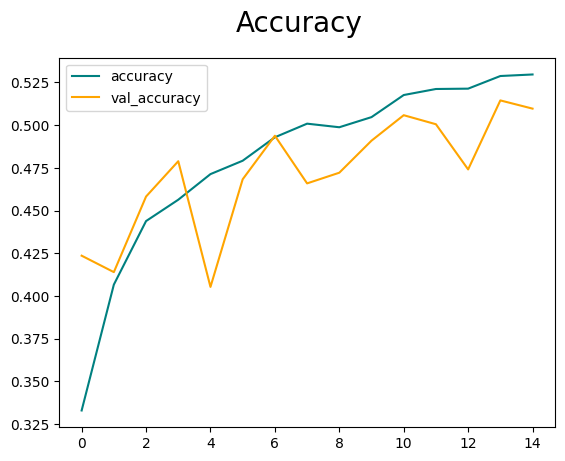

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
tf.keras.models.save_model(model,'/content/drive/MyDrive/vgg19_classifier.h5')

In [ ]:
test=tf.keras.models.load_model('/content/drive/MyDrive/vgg19_classifier.h5')

In [ ]:
history = test.fit(x=train,epochs=20,validation_data=val)

Epoch 1/20
939/939 [==============================] - 210s 221ms/step - loss: 1.1995 - accuracy: 0.5274 - val_loss: 1.2276 - val_accuracy: 0.5192
Epoch 2/20
939/939 [==============================] - 209s 222ms/step - loss: 1.1910 - accuracy: 0.5333 - val_loss: 1.2750 - val_accuracy: 0.5010
Epoch 3/20
939/939 [==============================] - 208s 221ms/step - loss: 1.1843 - accuracy: 0.5357 - val_loss: 1.2720 - val_accuracy: 0.5038
Epoch 4/20
939/939 [==============================] - 208s 220ms/step - loss: 1.1667 - accuracy: 0.5432 - val_loss: 1.2884 - val_accuracy: 0.5130
Epoch 5/20
939/939 [==============================] - 215s 228ms/step - loss: 1.1776 - accuracy: 0.5429 - val_loss: 1.2332 - val_accuracy: 0.5274
Epoch 6/20
939/939 [==============================] - 208s 221ms/step - loss: 1.1599 - accuracy: 0.5460 - val_loss: 1.2757 - val_accuracy: 0.5077
Epoch 7/20
939/939 [==============================] - 215s 228ms/step - loss: 1.1590 - accuracy: 0.5438 - val_loss: 1.3411 -

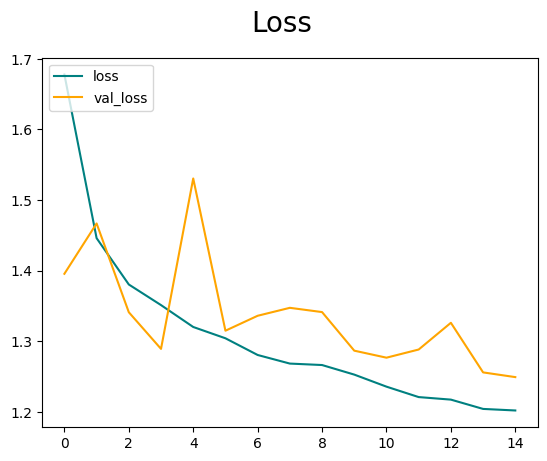

In [ ]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

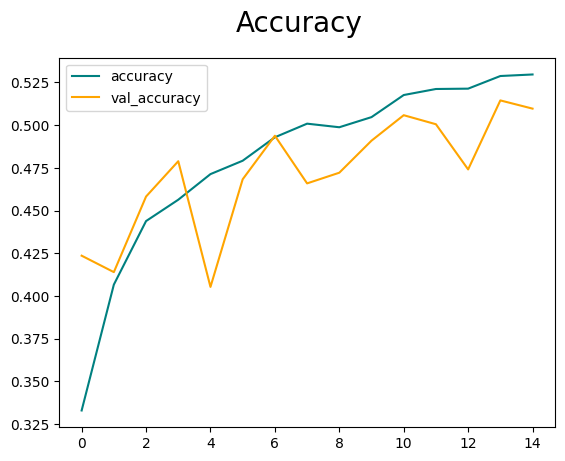

In [ ]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
tf.keras.models.save_model(test,'/content/drive/MyDrive/vgg19_classifier.h5')

3rd training

In [ ]:
test=tf.keras.models.load_model('/content/drive/MyDrive/vgg19_classifier.h5')

In [ ]:
history = test.fit(x=train,epochs=15,validation_data=val)

Epoch 1/15
939/939 [==============================] - 2890s 3s/step - loss: 1.1439 - accuracy: 0.5496 - val_loss: 1.3521 - val_accuracy: 0.5053
Epoch 2/15
939/939 [==============================] - 601s 639ms/step - loss: 1.1059 - accuracy: 0.5687 - val_loss: 1.3244 - val_accuracy: 0.4966
Epoch 3/15
939/939 [==============================] - 216s 229ms/step - loss: 1.0990 - accuracy: 0.5754 - val_loss: 1.3526 - val_accuracy: 0.4976
Epoch 4/15
 68/939 [=>............................] - ETA: 3:02 - loss: 1.1127 - accuracy: 0.5625

In [ ]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
tf.keras.models.save_model(test,'/content/drive/MyDrive/vgg19_classifier2.h5')